In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Import the Excel

In [2]:
# Load the dataset
df = pd.read_excel("Models\IWA.xlsx", sheet_name='Final Raw Sample(3%)')
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Industry (Exiobase),Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,Activities auxiliary to financial intermediati...,-0.010415,-0.046989,-1.148703e+07,-1.123710e+07,-2602.469978,...,-61541.905533,-1059.042606,-4.601425,-0.370166,-1295.252263,-5.484575,71.252219,71.252219,-468.060022,0.006135
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.006172,-0.012754,-7.244098e+05,-7.079386e+05,-165.923420,...,-4823.472569,-168.146428,-1.369721,-0.435001,-80.693593,-1.632612,16.655875,16.655875,-28.698267,0.043215
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.005523,-0.034259,-2.188151e+07,-2.140410e+07,-5012.270759,...,-117104.605466,-3804.051175,-16.528190,-1.329625,-2484.645598,-19.700439,255.935962,255.935962,-892.152710,0.011467
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,Activities auxiliary to financial intermediati...,-0.005327,NaN,-8.341370e+05,-8.153911e+05,-184.180256,...,-4396.445439,-901.413470,-0.184194,-0.363841,-91.327105,-0.219547,0.618135,0.618135,-33.382235,0.016390
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,Activities auxiliary to financial intermediati...,-0.002534,-0.018462,-1.448471e+07,-1.416778e+07,-3433.217789,...,-77276.296027,-4116.308632,-36.717300,-3.292484,-1668.361350,-43.764435,588.677794,588.677794,-591.706523,0.033005


## Create the Revenue Column based on the Intensity and Total Environmental Cost

In [3]:
df["Revenue"] = df["Total Environmental Cost"]/df["Environmental Intensity (Sales)"]
df["Operating Income"] = df["Total Environmental Cost"]/df["Environmental Intensity (Op Inc)"]
df = df.drop("Industry (Exiobase)", axis=1)
df.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
0,2019,SAGA PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Multi-line Insurance,-0.010415,-0.046989,-1.148703e+07,-1.123710e+07,-2602.469978,-149400.981817,...,-4.601425,-0.370166,-1295.252263,-5.484575,71.252219,71.252219,-468.060022,0.006135,1.102887e+09,244464000.0
1,2019,BURSA MALAYSIA BHD,MALAYSIA,Financial Exchanges & Data,-0.006172,-0.012754,-7.244098e+05,-7.079386e+05,-165.923420,-9177.045432,...,-1.369721,-0.435001,-80.693593,-1.632612,16.655875,16.655875,-28.698267,0.043215,1.173640e+08,56797000.0
2,2019,INTERTEK GROUP PLC,UNITED KINGDOM OF GREAT BRITAIN AND NORTHERN I...,Research & Consulting Services,-0.005523,-0.034259,-2.188151e+07,-2.140410e+07,-5012.270759,-284492.790136,...,-16.528190,-1.329625,-2484.645598,-19.700439,255.935962,255.935962,-892.152710,0.011467,3.961539e+09,638704000.0
3,2019,JSE LIMITED,SOUTH AFRICA,Financial Exchanges & Data,-0.005327,NaN,-8.341370e+05,-8.153911e+05,-184.180256,-10731.296036,...,-0.184194,-0.363841,-91.327105,-0.219547,0.618135,0.618135,-33.382235,0.016390,1.565900e+08,NaN
4,2019,BUREAU VERITAS SA,FRANCE,Research & Consulting Services,-0.002534,-0.018462,-1.448471e+07,-1.416778e+07,-3433.217789,-188710.049914,...,-36.717300,-3.292484,-1668.361350,-43.764435,588.677794,588.677794,-591.706523,0.033005,5.717172e+09,784560000.0


## Filter for only Molson Company

In [4]:
molson_df = df[df['Company Name'] == 'MOLSON COORS BEVERAGE CO']
# Group the data by "Company Name" and count unique years for each group
molson_df

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
519,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.048069,-0.339027,-5.085402e+08,-1.099335e+08,-29928.965649,-1.448611e+06,...,-1080.784815,-117.835584,-13512.921279,-1288.219368,16032.014249,16032.014249,-4470.382055,0.059202,1.057940e+10,1.500000e+09
2194,2018,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025744,-0.209028,-2.772550e+08,-1.169133e+08,-31611.242713,-1.541198e+06,...,-1100.215527,-119.954072,-14327.963151,-1311.379407,16320.243176,16320.243176,-4758.998067,0.083980,1.076960e+10,1.326400e+09
3816,2017,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025079,-0.159835,-2.759400e+08,-1.194184e+08,-32289.690203,-1.574218e+06,...,-1124.039091,-122.551503,-14635.190360,-1339.775418,16673.634268,16673.634268,-4860.946512,0.085090,1.100280e+10,1.726400e+09
5489,2016,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.015817,-0.159051,-7.726682e+07,-2.411708e+07,-7726.386442,-3.145306e+05,...,-499.048511,-54.410158,-3192.939884,-594.830672,7402.725070,7402.725070,-955.214886,0.140587,4.885000e+09,4.858000e+08
7015,2015,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025950,-0.243491,-9.257512e+07,-2.639604e+07,-7644.003187,-3.465374e+05,...,-362.827764,-39.558311,-3334.701232,-432.465137,5382.070332,5382.070332,-1063.324579,0.094867,3.567500e+09,3.802000e+08
8502,2014,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.022763,-0.197535,-9.438198e+07,-3.281256e+07,-9231.181630,-4.315381e+05,...,-389.867109,-42.506351,-4091.974925,-464.694131,5783.163268,5783.163268,-1327.756606,0.093264,4.146300e+09,4.778000e+08
9886,2013,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.024967,-0.227303,-1.050138e+08,-3.477790e+07,-9573.082281,-4.579788e+05,...,-365.594201,-39.859929,-4295.525283,-435.762534,5423.106757,5423.106757,-1411.918349,0.081540,4.206100e+09,4.620000e+08
11174,2012,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.026418,-0.212983,-1.034670e+08,-2.216933e+07,-6631.632401,-2.904524e+05,...,-352.495445,-38.431801,-2842.392790,-420.149740,5228.804030,5228.804030,-888.409730,0.090688,3.916500e+09,4.858000e+08
12311,2011,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.027893,-0.212303,-9.806260e+07,-2.304791e+07,-6836.905540,-3.021249e+05,...,-353.478057,-38.538933,-2943.709650,-421.320945,5243.379786,5243.379786,-924.881600,0.093072,3.515700e+09,4.619000e+08
13363,2010,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.039733,-0.298631,-1.293072e+08,-1.581544e+07,-13450.825654,-1.856321e+05,...,-659.956932,-34.693554,-5894.939568,-786.622175,9770.844154,9770.844154,-808.873738,0.010385,3.254400e+09,4.330000e+08


# Boxplots

## Absoulte Values

In [5]:
df_abs_box = molson_df.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_abs_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-1.099335e+08
1,Brewers,Working Capacity,-1.169133e+08
2,Brewers,Working Capacity,-1.194184e+08
3,Brewers,Working Capacity,-2.411708e+07
4,Brewers,Working Capacity,-2.639604e+07
...,...,...,...
75,Brewers,Wood Production Capacity,1.156633e+04
76,Brewers,Wood Production Capacity,1.084621e+04
77,Brewers,Wood Production Capacity,1.045761e+04
78,Brewers,Wood Production Capacity,1.048676e+04


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


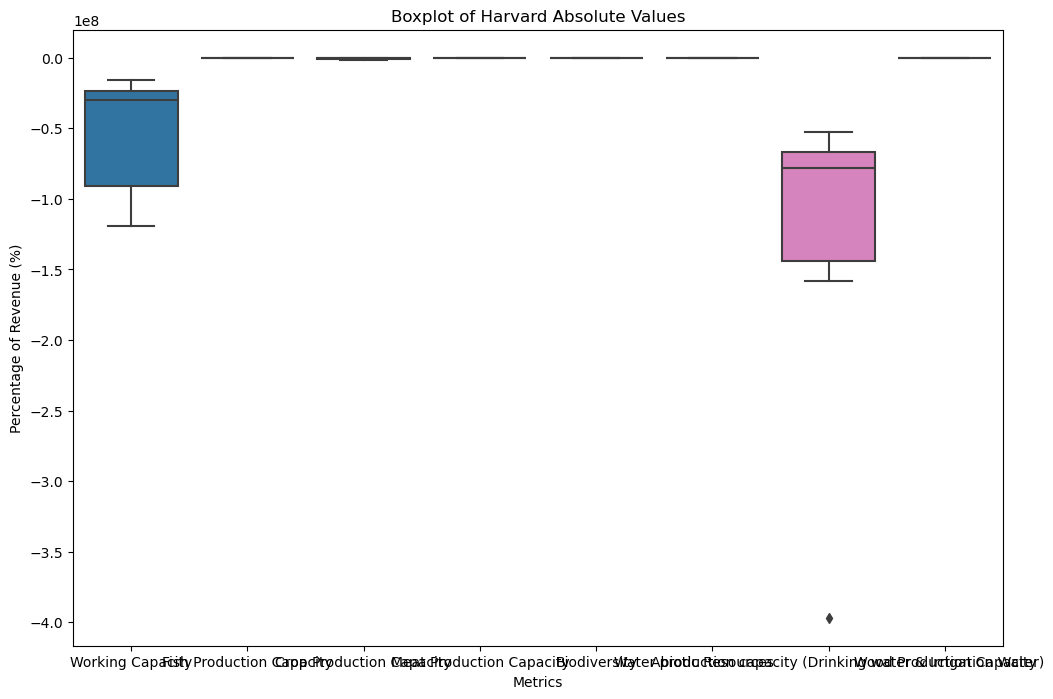

In [6]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_abs_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard Absolute Values')
plt.show()

## Percentage of Revenue

In [7]:
df_rev = molson_df.copy()
for column in df_rev.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_rev[column] = (df_rev[column] / df_rev['Revenue'])*100
df_rev.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
519,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.048069,-0.339027,-5.085402e+08,-1.039128,-0.000283,-0.013693,...,-0.00001,-0.000001,-0.000128,-0.000012,0.000152,0.000152,-0.000042,0.059202,1.057940e+10,1.500000e+09
2194,2018,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025744,-0.209028,-2.772550e+08,-1.085586,-0.000294,-0.014311,...,-0.00001,-0.000001,-0.000133,-0.000012,0.000152,0.000152,-0.000044,0.083980,1.076960e+10,1.326400e+09
3816,2017,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025079,-0.159835,-2.759400e+08,-1.085346,-0.000293,-0.014307,...,-0.00001,-0.000001,-0.000133,-0.000012,0.000152,0.000152,-0.000044,0.085090,1.100280e+10,1.726400e+09
5489,2016,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.015817,-0.159051,-7.726682e+07,-0.493697,-0.000158,-0.006439,...,-0.00001,-0.000001,-0.000065,-0.000012,0.000152,0.000152,-0.000020,0.140587,4.885000e+09,4.858000e+08
7015,2015,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025950,-0.243491,-9.257512e+07,-0.739903,-0.000214,-0.009714,...,-0.00001,-0.000001,-0.000093,-0.000012,0.000151,0.000151,-0.000030,0.094867,3.567500e+09,3.802000e+08


In [8]:
df_rev_box = df_rev.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_rev_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-1.039128
1,Brewers,Working Capacity,-1.085586
2,Brewers,Working Capacity,-1.085346
3,Brewers,Working Capacity,-0.493697
4,Brewers,Working Capacity,-0.739903
...,...,...,...
75,Brewers,Wood Production Capacity,0.000279
76,Brewers,Wood Production Capacity,0.000258
77,Brewers,Wood Production Capacity,0.000267
78,Brewers,Wood Production Capacity,0.000298


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


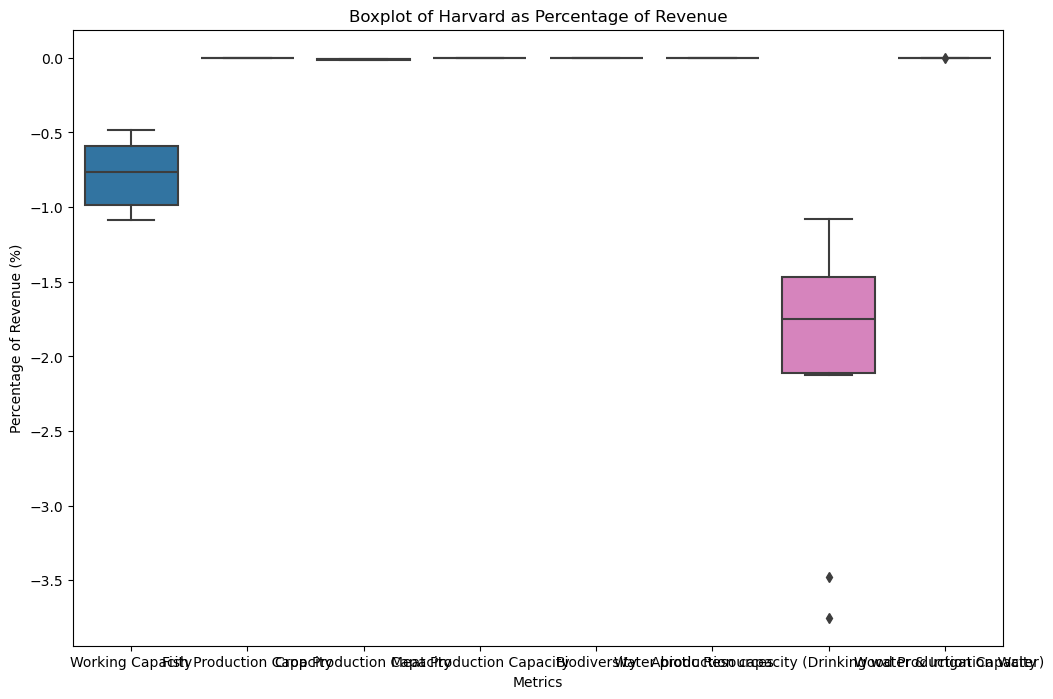

In [9]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_rev_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Revenue (%)')
plt.title('Boxplot of Harvard as Percentage of Revenue')
plt.show()

## Percentage of Op Income

In [10]:
df_opinc = molson_df.copy()
for column in df_opinc.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_opinc[column] = (df_opinc[column] / df_opinc['Operating Income'])*100
df_opinc.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
519,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.048069,-0.339027,-5.085402e+08,-7.328899,-0.001995,-0.096574,...,-0.000072,-0.000008,-0.000901,-0.000086,0.001069,0.001069,-0.000298,0.059202,1.057940e+10,1.500000e+09
2194,2018,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025744,-0.209028,-2.772550e+08,-8.814330,-0.002383,-0.116194,...,-0.000083,-0.000009,-0.001080,-0.000099,0.001230,0.001230,-0.000359,0.083980,1.076960e+10,1.326400e+09
3816,2017,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025079,-0.159835,-2.759400e+08,-6.917192,-0.001870,-0.091185,...,-0.000065,-0.000007,-0.000848,-0.000078,0.000966,0.000966,-0.000282,0.085090,1.100280e+10,1.726400e+09
5489,2016,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.015817,-0.159051,-7.726682e+07,-4.964405,-0.001590,-0.064745,...,-0.000103,-0.000011,-0.000657,-0.000122,0.001524,0.001524,-0.000197,0.140587,4.885000e+09,4.858000e+08
7015,2015,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025950,-0.243491,-9.257512e+07,-6.942671,-0.002011,-0.091146,...,-0.000095,-0.000010,-0.000877,-0.000114,0.001416,0.001416,-0.000280,0.094867,3.567500e+09,3.802000e+08


In [11]:
df_opinc_box = df_opinc.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_opinc_box

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,-7.328899
1,Brewers,Working Capacity,-8.814330
2,Brewers,Working Capacity,-6.917192
3,Brewers,Working Capacity,-4.964405
4,Brewers,Working Capacity,-6.942671
...,...,...,...
75,Brewers,Wood Production Capacity,0.002421
76,Brewers,Wood Production Capacity,0.002348
77,Brewers,Wood Production Capacity,0.002153
78,Brewers,Wood Production Capacity,0.002270


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


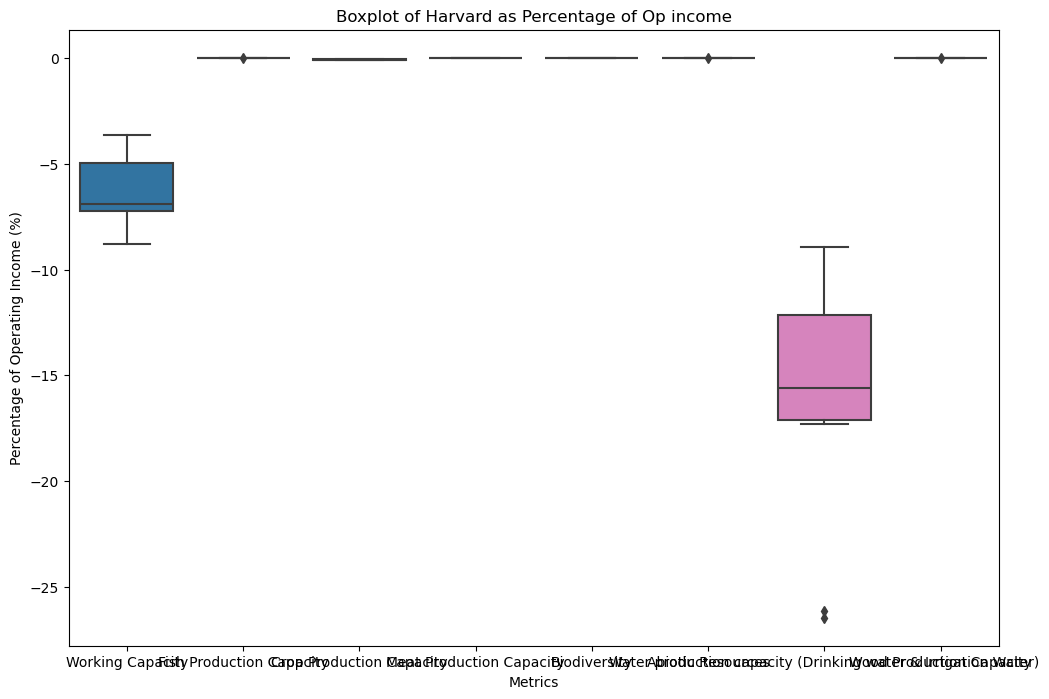

In [12]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of Harvard as Percentage of Op income')
plt.show()

## On Total Environmental Cost

In [13]:
df_cost = molson_df.copy()
for column in df_cost.loc[:,"Working Capacity":"SDG 15.5"]:
    #print(column)
    df_cost[column] = (df_cost[column] / df_cost['Total Environmental Cost']) * 100
df_cost.head()

,Year,Company Name,Country,GICS Sub-Industry,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,Working Capacity,Fish Production Capacity,Crop Production Capacity,...,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue,Operating Income
519,2019,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.048069,-0.339027,-5.085402e+08,21.617463,0.005885,0.284857,...,0.000213,0.000023,0.002657,0.000253,-0.003153,-0.003153,0.000879,0.059202,1.057940e+10,1.500000e+09
2194,2018,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025744,-0.209028,-2.772550e+08,42.168143,0.011402,0.555877,...,0.000397,0.000043,0.005168,0.000473,-0.005886,-0.005886,0.001716,0.083980,1.076960e+10,1.326400e+09
3816,2017,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025079,-0.159835,-2.759400e+08,43.276947,0.011702,0.570493,...,0.000407,0.000044,0.005304,0.000486,-0.006042,-0.006042,0.001762,0.085090,1.100280e+10,1.726400e+09
5489,2016,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.015817,-0.159051,-7.726682e+07,31.212723,0.010000,0.407071,...,0.000646,0.000070,0.004132,0.000770,-0.009581,-0.009581,0.001236,0.140587,4.885000e+09,4.858000e+08
7015,2015,MOLSON COORS BEVERAGE CO,UNITED STATES OF AMERICA,Brewers,-0.025950,-0.243491,-9.257512e+07,28.513098,0.008257,0.374331,...,0.000392,0.000043,0.003602,0.000467,-0.005814,-0.005814,0.001149,0.094867,3.567500e+09,3.802000e+08


In [14]:
df_melted = df_cost.melt(id_vars='GICS Sub-Industry', value_vars=[ "Working Capacity","Fish Production Capacity","Crop Production Capacity","Meat Production Capacity","Biodiversity","Abiotic Resources","Water production capacity (Drinking water & Irrigation Water)","Wood Production Capacity"])
df_melted

,GICS Sub-Industry,variable,value
0,Brewers,Working Capacity,21.617463
1,Brewers,Working Capacity,42.168143
2,Brewers,Working Capacity,43.276947
3,Brewers,Working Capacity,31.212723
4,Brewers,Working Capacity,28.513098
...,...,...,...
75,Brewers,Wood Production Capacity,-0.012255
76,Brewers,Wood Production Capacity,-0.010328
77,Brewers,Wood Production Capacity,-0.010107
78,Brewers,Wood Production Capacity,-0.010694


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


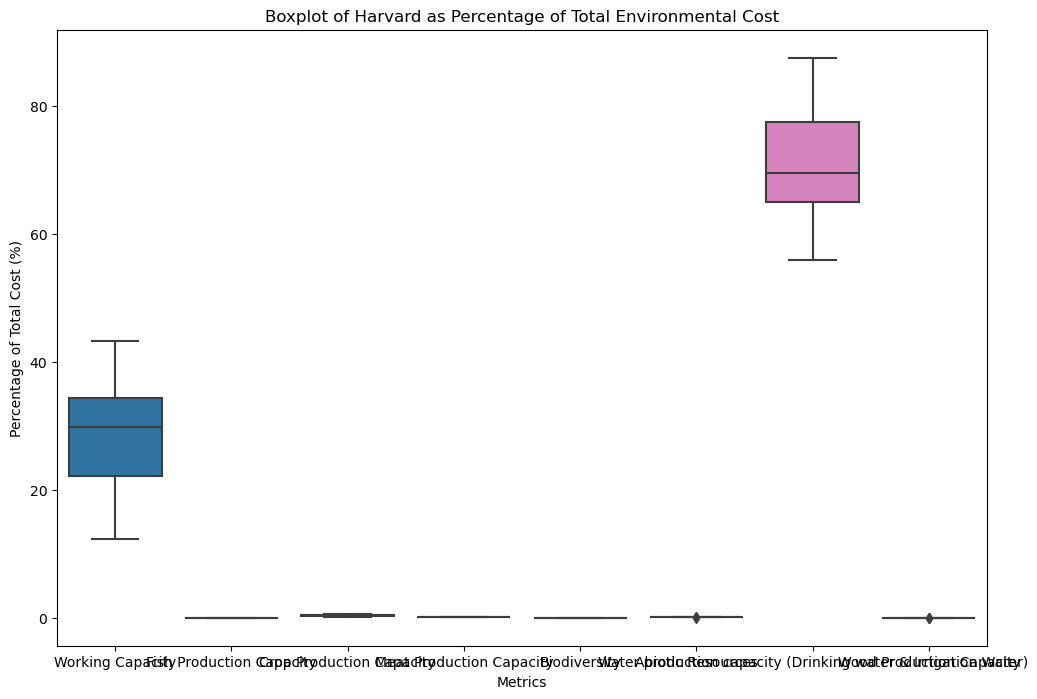

In [15]:
# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='variable', y='value', data=df_melted)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Total Cost (%)')
plt.title('Boxplot of Harvard as Percentage of Total Environmental Cost')
plt.show()

## On SDGs

In [16]:
df_opinc_box = df_opinc.melt(id_vars='GICS Sub-Industry', value_vars=df_opinc.loc[:,"SDG 1.5":"SDG 15.5"])
df_opinc_box

,GICS Sub-Industry,variable,value
0,Brewers,SDG 1.5,-3.152691
1,Brewers,SDG 1.5,-3.798258
2,Brewers,SDG 1.5,-2.980721
3,Brewers,SDG 1.5,-2.039936
4,Brewers,SDG 1.5,-2.938357
...,...,...,...
165,Brewers,SDG 15.5,-0.000278
166,Brewers,SDG 15.5,-0.000306
167,Brewers,SDG 15.5,-0.000183
168,Brewers,SDG 15.5,-0.000200


c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


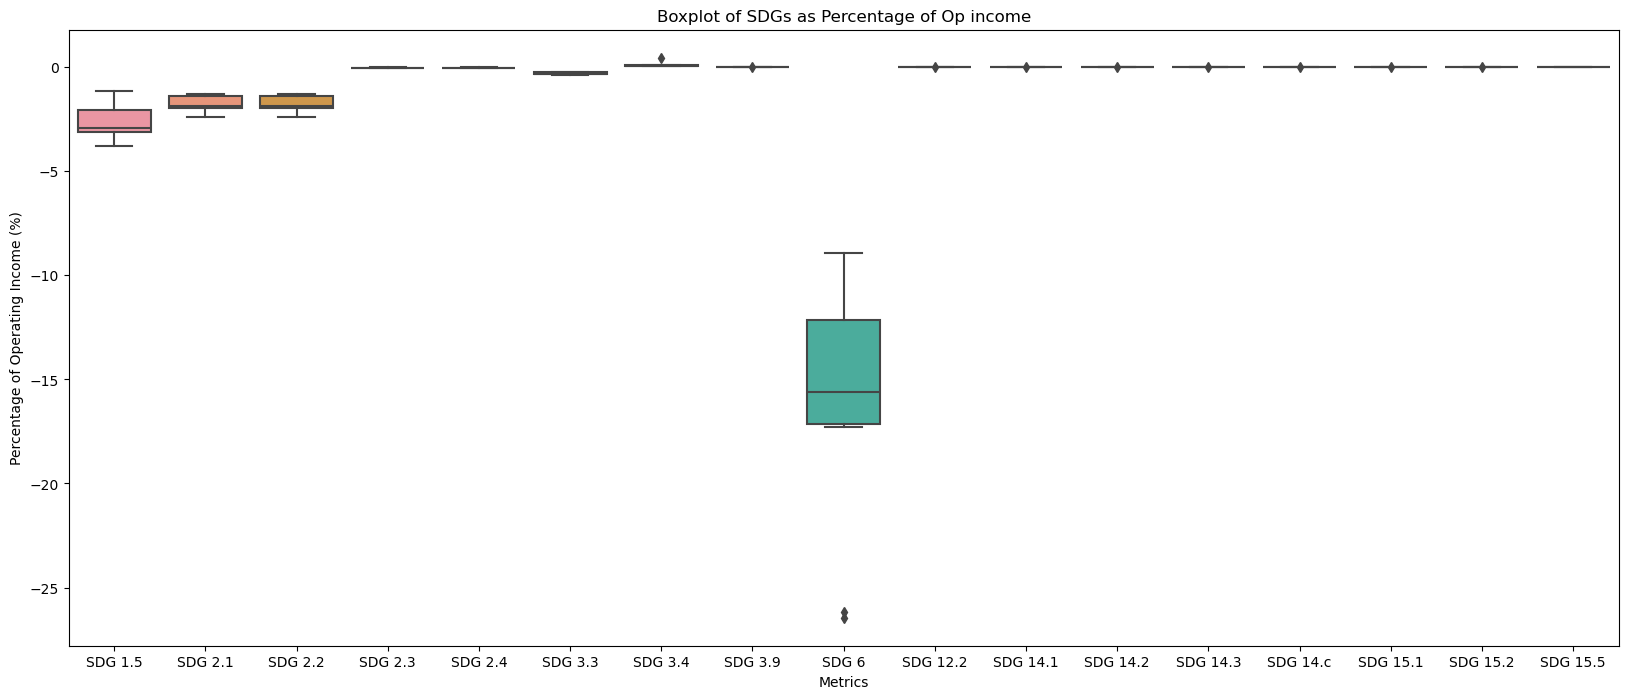

In [18]:
# Create the boxplot
plt.figure(figsize=(20, 8))
sns.boxplot(x='variable', y='value', data=df_opinc_box)
plt.xlabel('Metrics')
plt.ylabel('Percentage of Operating Income (%)')
plt.title('Boxplot of SDGs as Percentage of Op income')
plt.show()

# Further Analysis here

c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\alexa\mambaforge\envs\spm\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


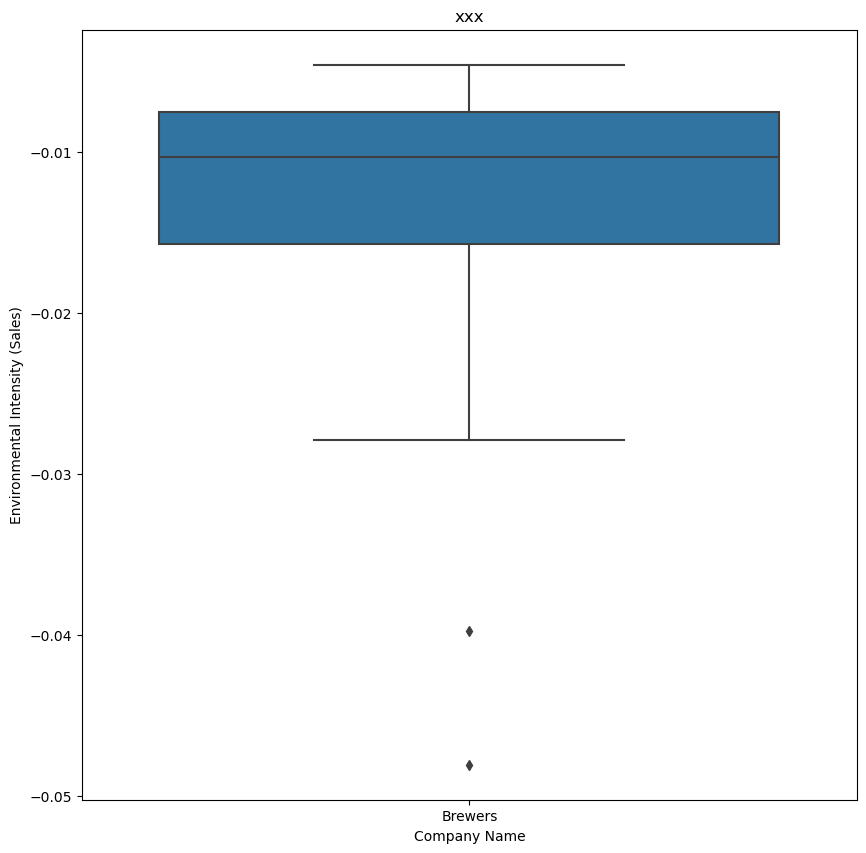

In [15]:
# Create a boxplot of Total Knowledge by Training Type
plt.figure(figsize=(10, 10))
sns.boxplot(x="GICS Sub-Industry", y="Environmental Intensity (Sales)", data=molson_df)
plt.xlabel("Company Name")
plt.ylabel("Environmental Intensity (Sales)")
plt.title("Molson ")
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

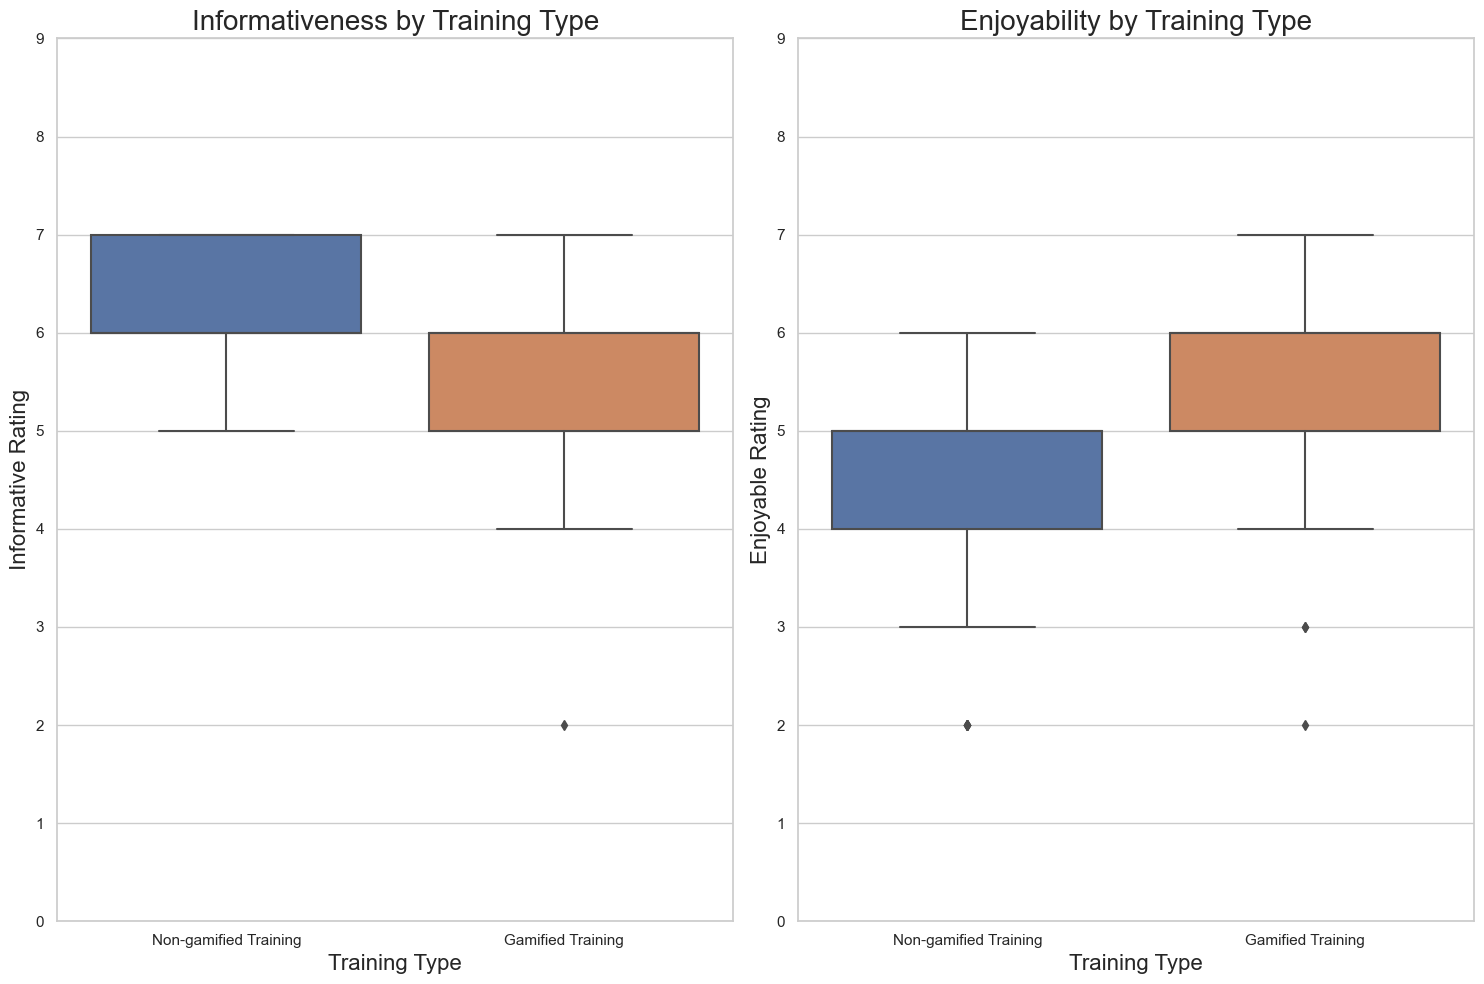

In [50]:
# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Boxplot for Informativeness by Training Type
sns.boxplot(x="TypeOfTraining", y="Informative", data=data, ax=axes[0])
axes[0].set_xlabel("Training Type", fontsize=16)
axes[0].set_ylabel("Informative Rating", fontsize=16)
axes[0].set_title("Informativeness by Training Type", fontsize=20)
axes[0].set_ylim(0, 9)  # Set the y-axis limits

# Boxplot for Enjoyability by Training Type
sns.boxplot(x="TypeOfTraining", y="Enjoyable", data=data, ax=axes[1])
axes[1].set_xlabel("Training Type", fontsize=16)
axes[1].set_ylabel("Enjoyable Rating", fontsize=16)
axes[1].set_title("Enjoyability by Training Type", fontsize=20)
axes[1].set_ylim(0, 9)  # Set the y-axis limits

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

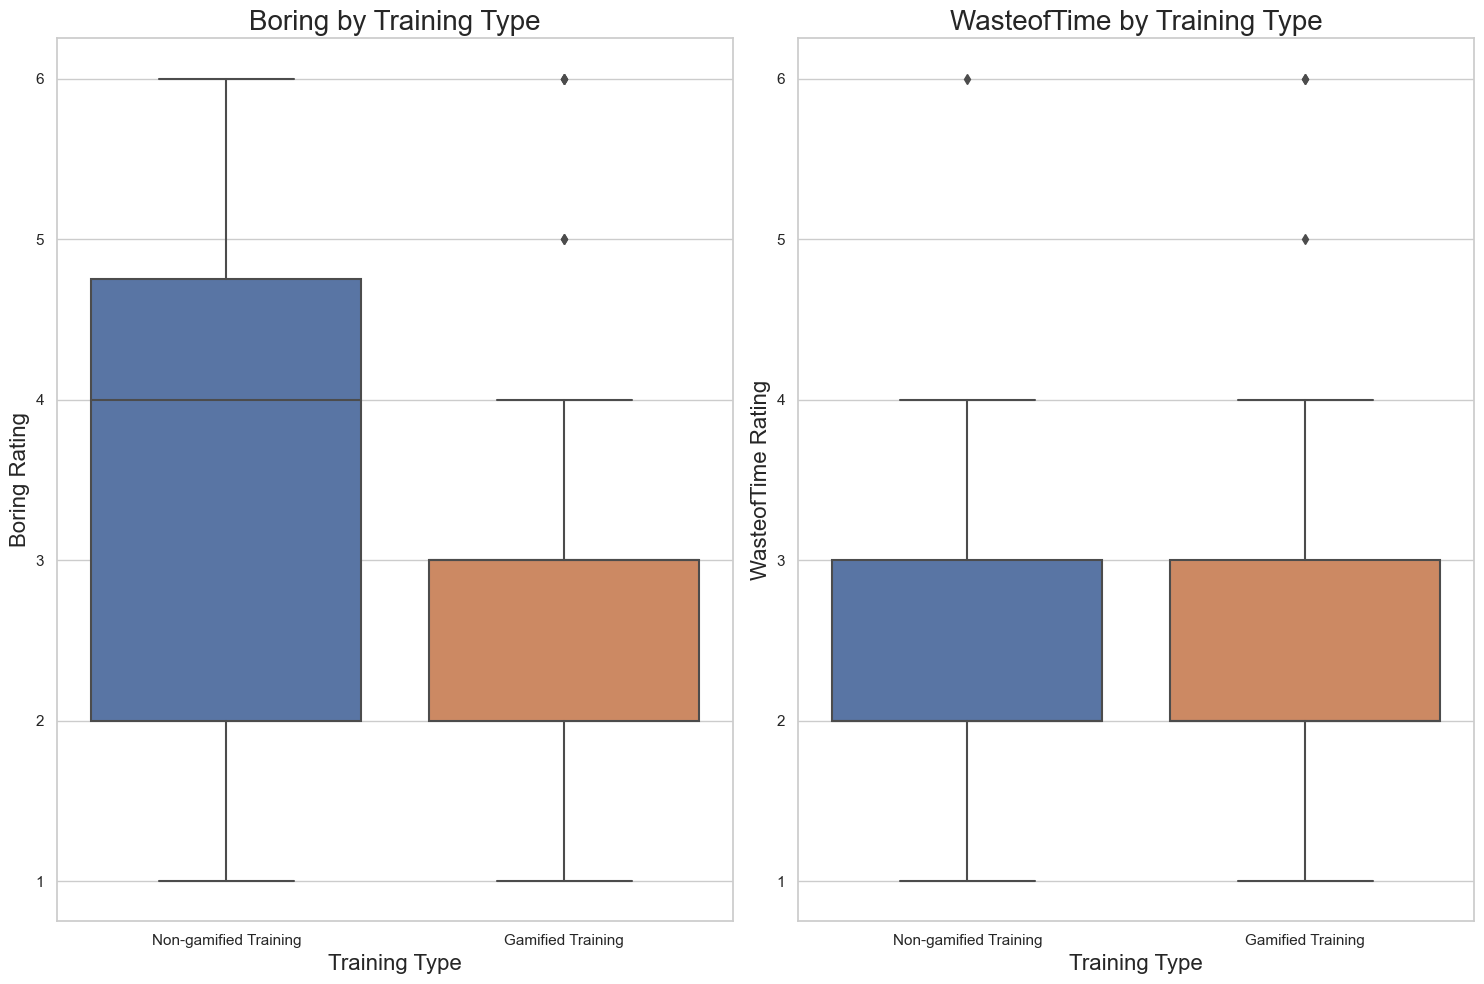

In [36]:
# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Boxplot for Informativeness by Training Type
sns.boxplot(x="TypeOfTraining", y="Boring", data=data, ax=axes[0])
axes[0].set_xlabel("Training Type", fontsize=16)
axes[0].set_ylabel("Boring Rating", fontsize=16)
axes[0].set_title("Boring by Training Type", fontsize=20)

# Boxplot for Enjoyability by Training Type
sns.boxplot(x="TypeOfTraining", y="WasteofTime", data=data, ax=axes[1])
axes[1].set_xlabel("Training Type", fontsize=16)
axes[1].set_ylabel("WasteofTime Rating", fontsize=16)
axes[1].set_title("WasteofTime by Training Type", fontsize=20)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

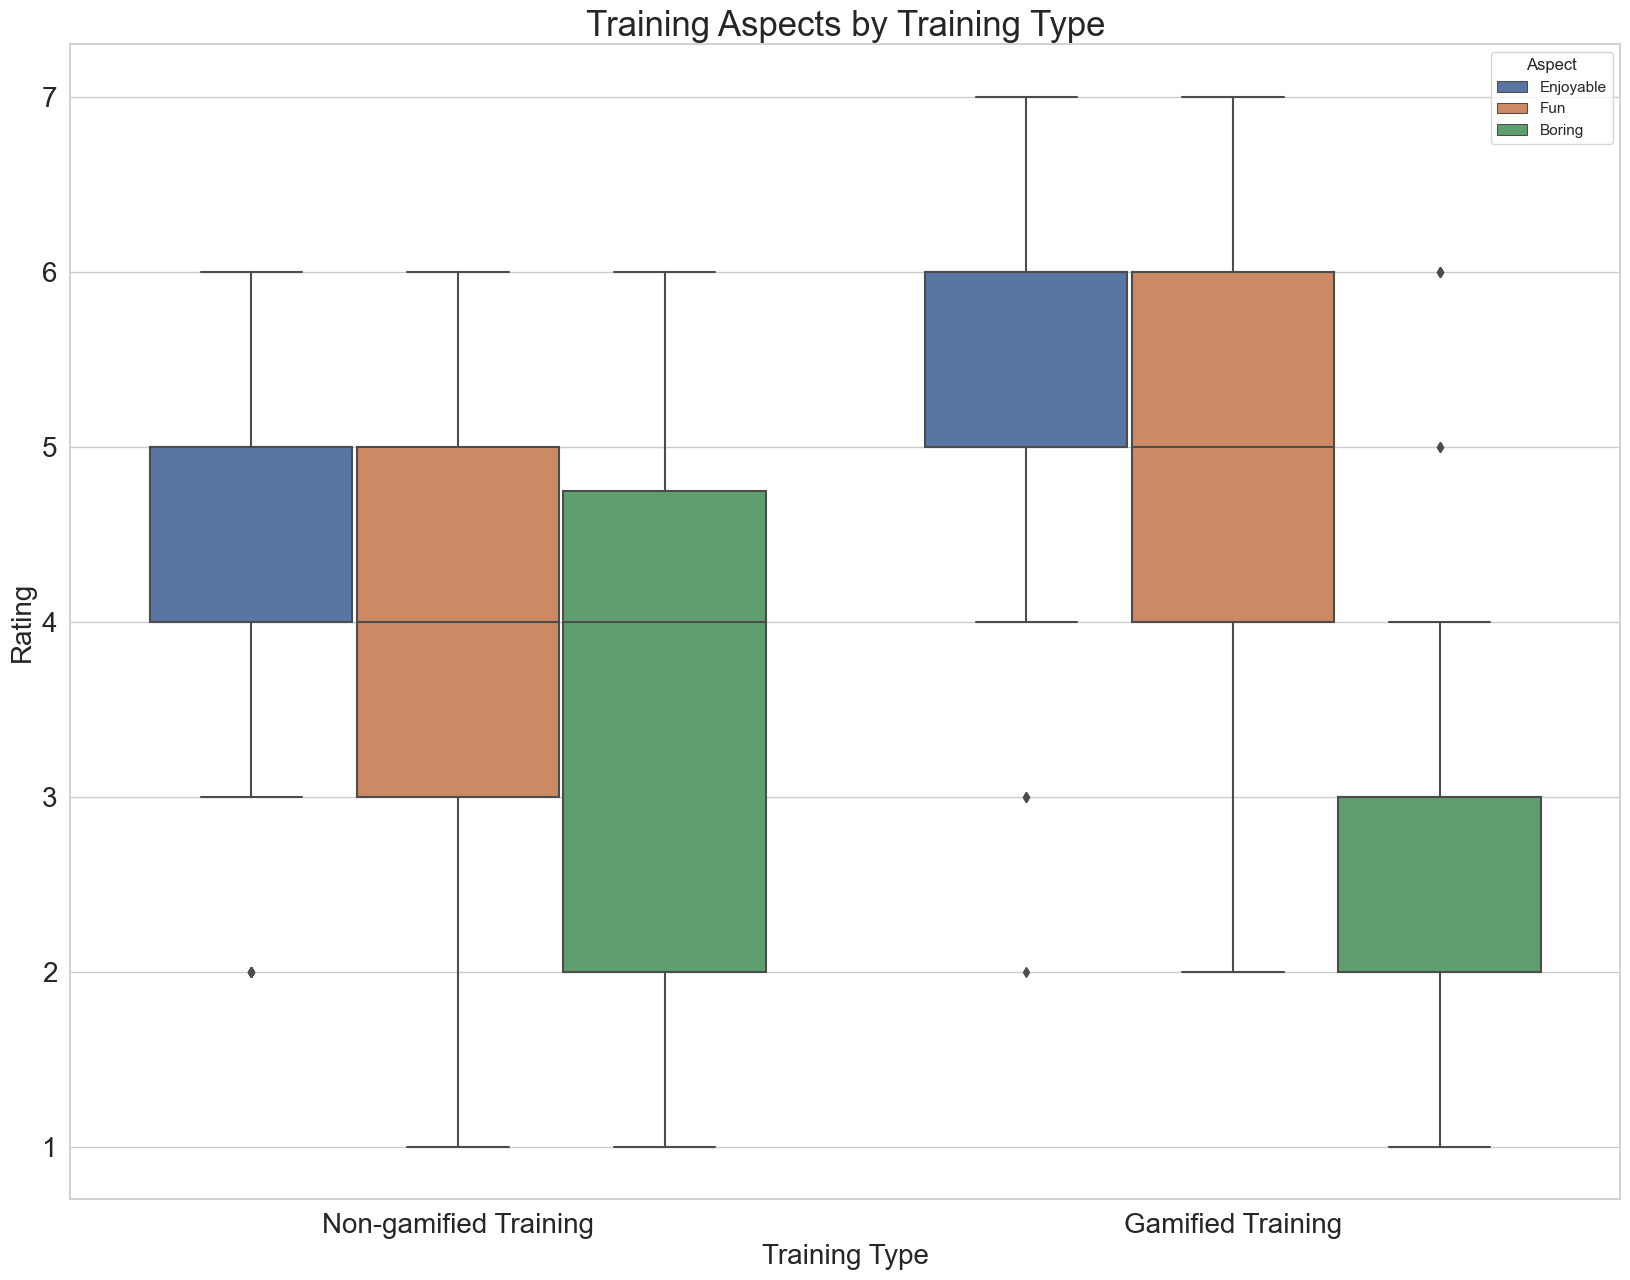

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["Enjoyable", "Fun", "Boring"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 15))
ax = sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type", fontsize=20)
plt.ylabel("Rating", fontsize=20)
plt.title("Training Aspects by Training Type", fontsize=25)
plt.legend(title="Aspect")
ax.tick_params(axis='x', labelsize=20)  # Set x-axis tick label size
ax.tick_params(axis='y', labelsize=20) 

# Show the plot
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

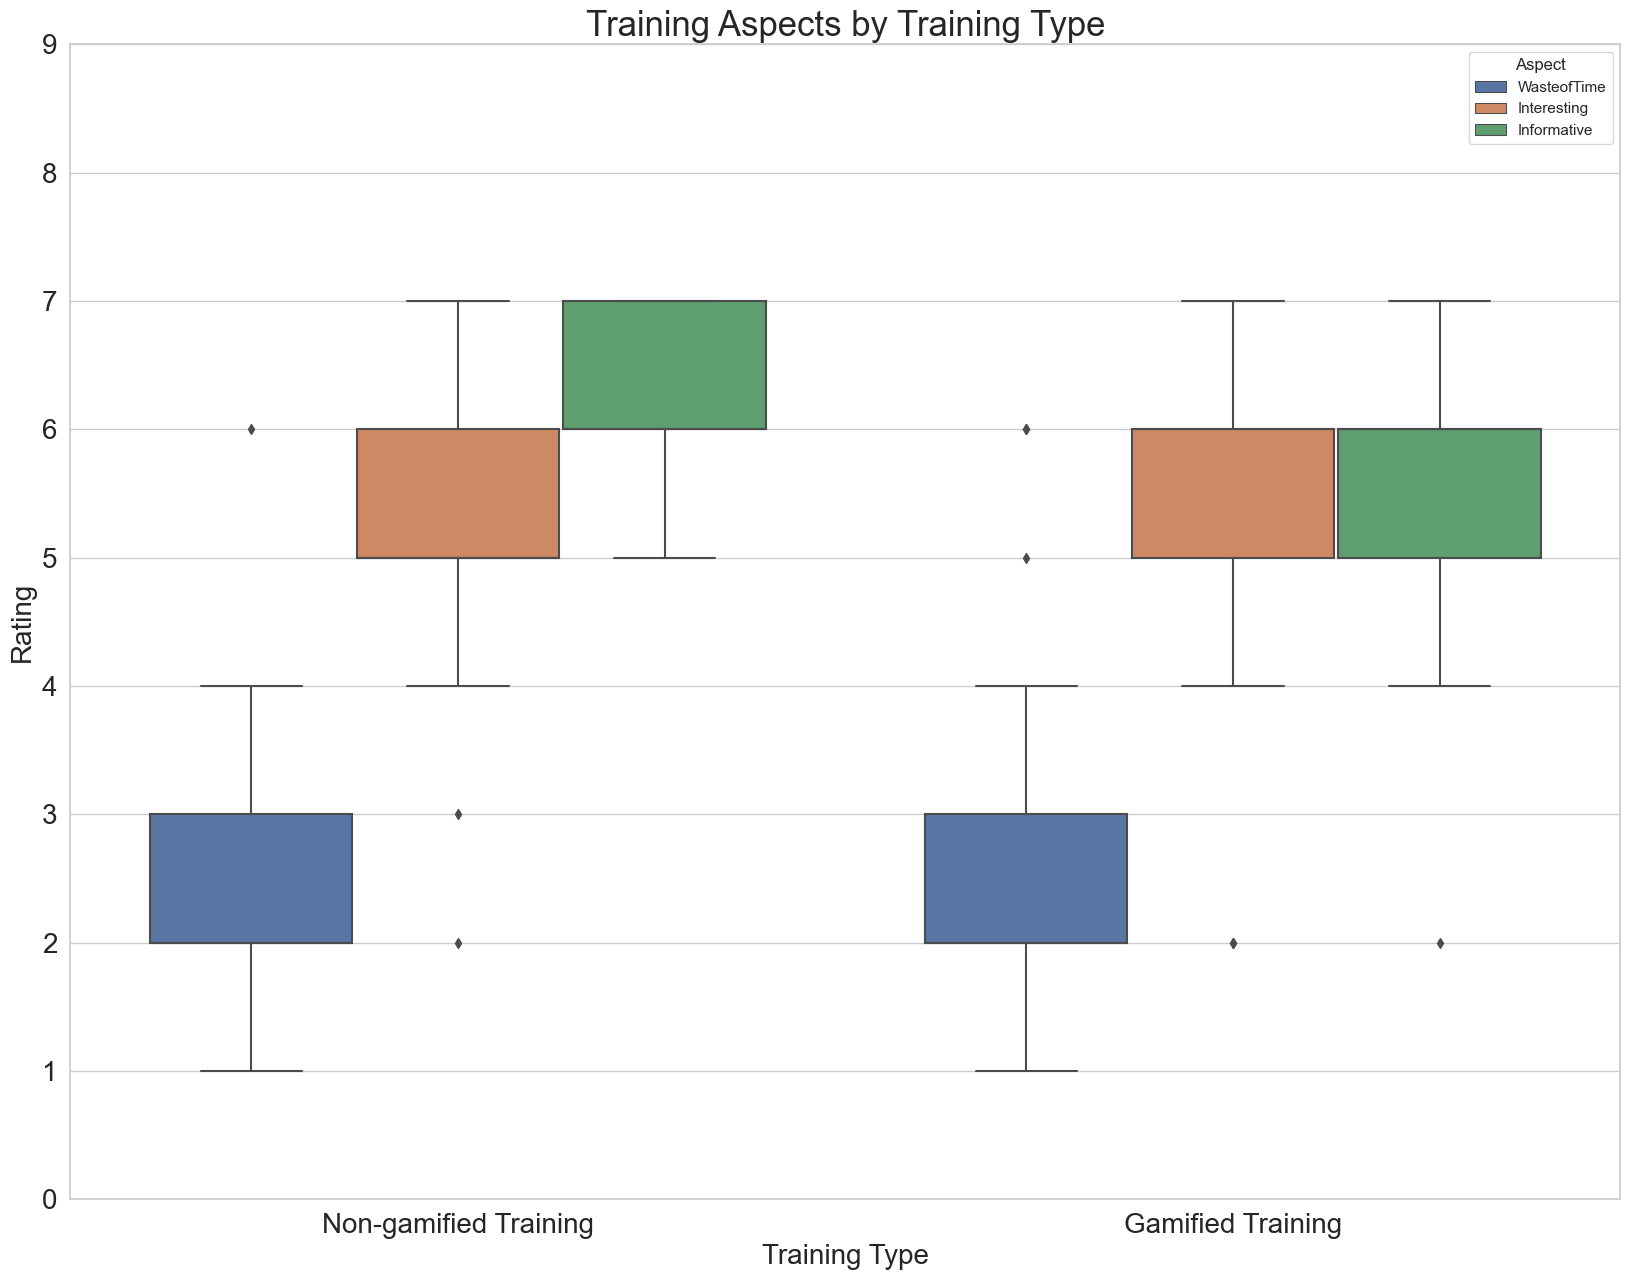

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["WasteofTime", "Interesting", "Informative"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 15))
ax = sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type", fontsize=20)
plt.ylabel("Rating", fontsize=20)
plt.title("Training Aspects by Training Type", fontsize=25)
plt.legend(title="Aspect")
ax.tick_params(axis='x', labelsize=20)  # Set x-axis tick label size
ax.tick_params(axis='y', labelsize=20) 
plt.ylim(0, 9)

# Show the plot
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_ylim'

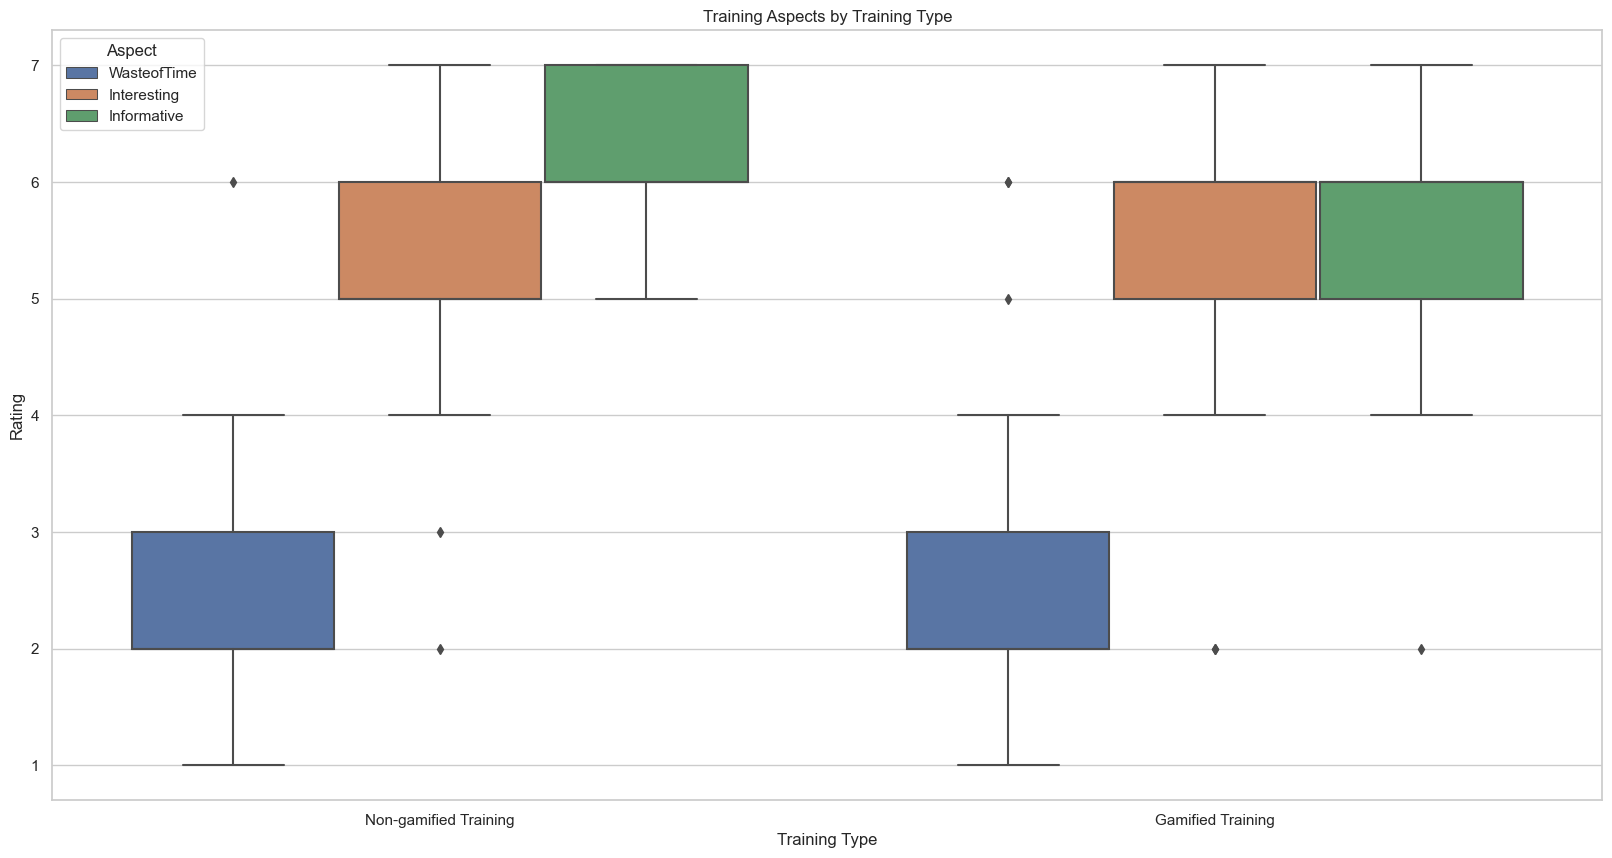

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["WasteofTime", "Interesting", "Informative"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 10))
sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type")
plt.ylabel("Rating")
plt.title("Training Aspects by Training Type")
plt.legend(title="Aspect")

# Show the plot
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

NameError: name 'np' is not defined

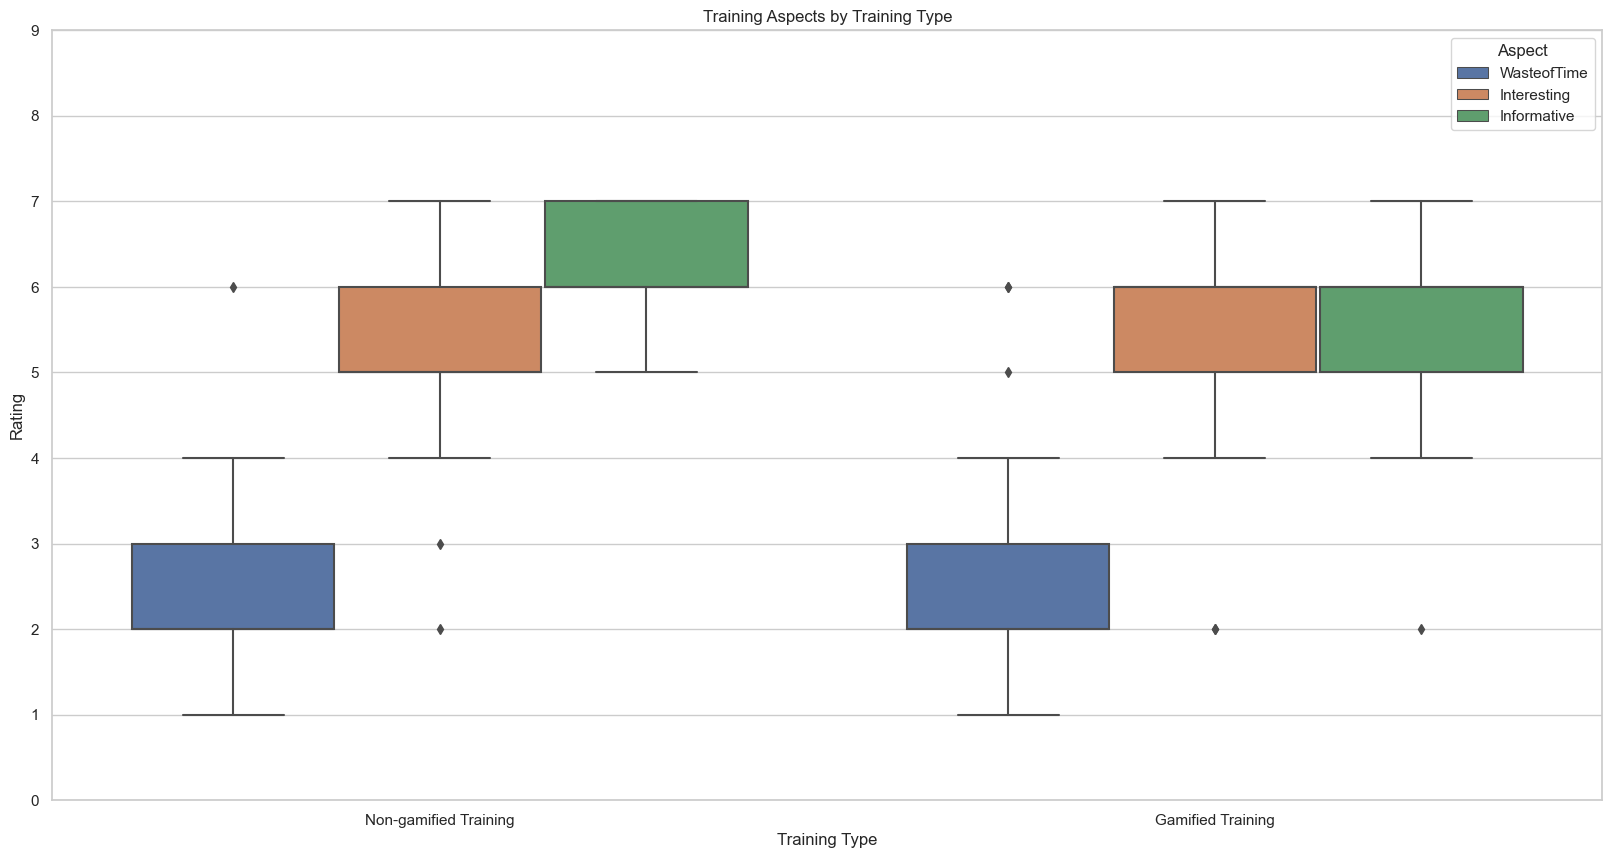

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Set the plot style
sns.set(style="whitegrid")

# Combine the aspects into a single DataFrame for plotting
aspects = ["WasteofTime", "Interesting", "Informative"]
combined_data = pd.melt(data, id_vars=["TypeOfTraining"], value_vars=aspects, var_name="Aspect", value_name="Rating")

# Create a boxplot showing all aspects grouped by Training Type
plt.figure(figsize=(20, 10))
ax = sns.boxplot(x="TypeOfTraining", y="Rating", hue="Aspect", data=combined_data)
plt.xlabel("Training Type")
plt.ylabel("Rating")
plt.title("Training Aspects by Training Type")
plt.legend(title="Aspect")
plt.ylim(0, 9)

# Add mean lines
medians = combined_data.groupby(['TypeOfTraining', 'Aspect'])['Rating'].median().values
median_labels = [str(np.round(s, 2)) for s in medians]
pos = range(len(medians))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], 9, median_labels[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

# Set the y-axis limit to 9

# Show the plot
plt.show()

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

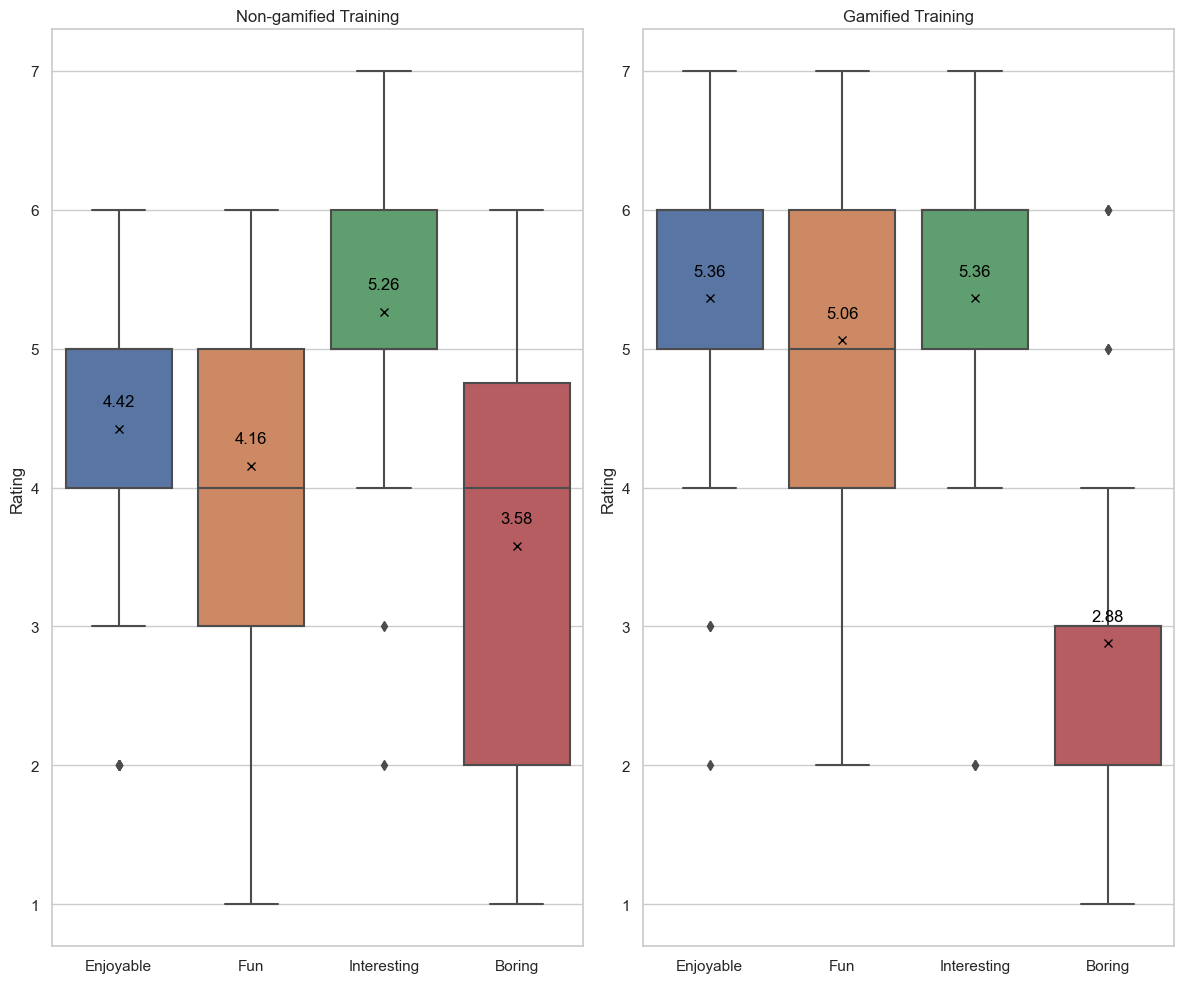

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for "Gamified Training" and "Non-gamified Training"
gamified_data = data[data['TypeOfTraining'] == 'Gamified Training']
non_gamified_data = data[data['TypeOfTraining'] == 'Non-gamified Training']

# Create a figure with two subplots (one for each training type)
fig, axes = plt.subplots(1, 2, figsize=(12, 10))

# Plot the box plots for each training type
sns.boxplot(data=non_gamified_data[['Enjoyable', 'Fun', 'Interesting', 'Boring']], ax=axes[0], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})
sns.boxplot(data=gamified_data[['Enjoyable', 'Fun', 'Interesting', 'Boring']], ax=axes[1], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})

# Calculate and display the mean values
for ax, data_type in zip(axes, ['Non-gamified Training', 'Gamified Training']):
    means = data[data['TypeOfTraining'] == data_type][['Enjoyable', 'Fun', 'Interesting', 'Boring']].mean()
    offset = 0.25
    for i, mean in enumerate(means):
        ax.text(i, mean + offset, f'{mean:.2f}', ha='center', va='top', fontsize=12, color='black')

# Set titles and labels
axes[0].set_title('Non-gamified Training')
axes[1].set_title('Gamified Training')
axes[0].set_ylabel('Rating')
axes[1].set_ylabel('Rating')

# Show the plot
plt.tight_layout()
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

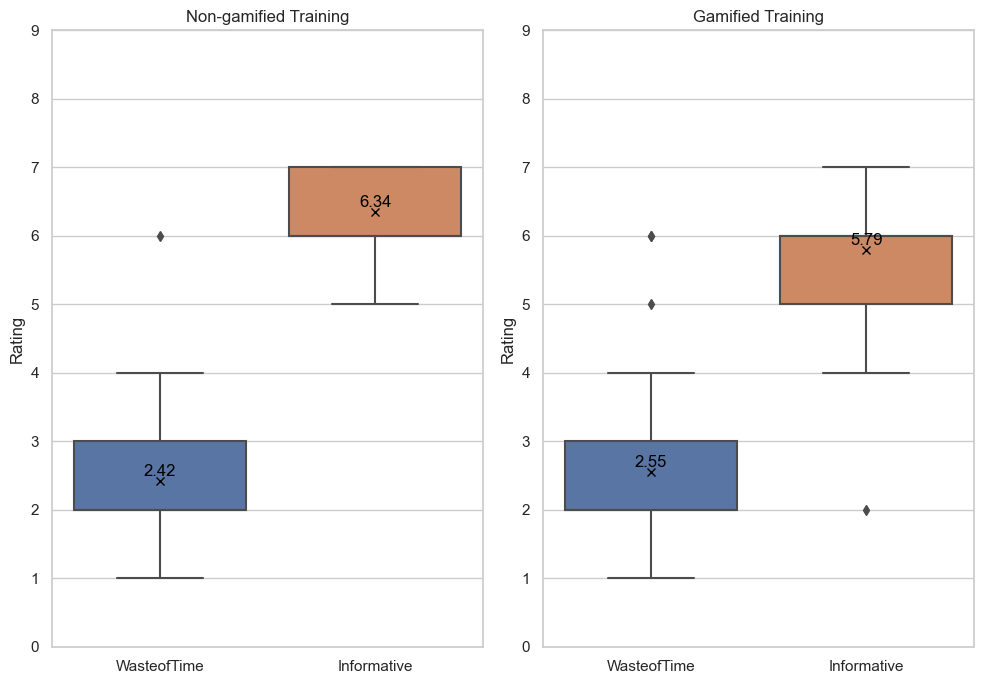

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for "Gamified Training" and "Non-gamified Training"
gamified_data = data[data['TypeOfTraining'] == 'Gamified Training']
non_gamified_data = data[data['TypeOfTraining'] == 'Non-gamified Training']

# Create a figure with two subplots (one for each training type)
fig, axes = plt.subplots(1, 2, figsize=(10, 7))

# Plot the box plots for each training type
sns.boxplot(data=non_gamified_data[["WasteofTime", "Informative"]], ax=axes[0], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})
sns.boxplot(data=gamified_data[["WasteofTime", "Informative"]], ax=axes[1], showmeans=True, meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"black"})

# Calculate and display the mean values
for ax, data_type in zip(axes, ['Non-gamified Training', 'Gamified Training']):
    means = data[data['TypeOfTraining'] == data_type][["WasteofTime", "Informative"]].mean()
    offset = 0.2
    for i, mean in enumerate(means):
        ax.text(i, mean + offset, f'{mean:.2f}', ha='center', va='top', fontsize=12, color='black')

# Set titles and labels
axes[0].set_ylim(0, 9)
axes[1].set_ylim(0, 9)
axes[0].set_title('Non-gamified Training')
axes[1].set_title('Gamified Training')
axes[0].set_ylabel('Rating')
axes[1].set_ylabel('Rating')

# Show the plot
plt.tight_layout()
plt.show()


c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


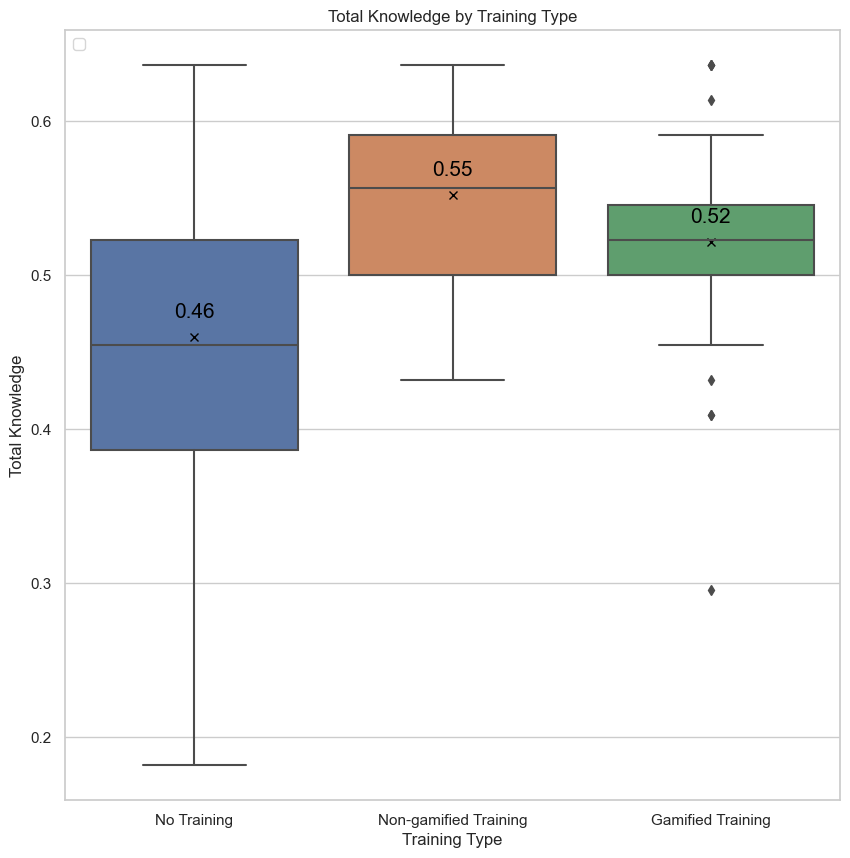

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map training types to colors

# Create a boxplot
plt.figure(figsize=(10, 10))
sns.boxplot(x='TypeOfTraining', y='TotalKnowledge', data=data)

averages = data.groupby('TypeOfTraining')['TotalKnowledge'].mean()
new_order = ['No Training', 'Non-gamified Training', 'Gamified Training']
averages = averages[new_order]
for i, avg in enumerate(averages):
    plt.plot(i, avg, 'x', markeredgecolor='black' ,markerfacecolor='black')
    plt.text(i, avg + 0.01, f'{avg:.2f}', ha='center', va='bottom', fontsize=15, color='black')

# Customize the plot
plt.title('Total Knowledge by Training Type')
plt.xlabel('Training Type')
plt.ylabel('Total Knowledge')
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [100]:
averages

TypeOfTraining
Gamified Training        0.521349
No Training              0.459596
Non-gamified Training    0.552033
Name: TotalKnowledge, dtype: float64

c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ianpe\mambaforge\envs\PythonBase\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


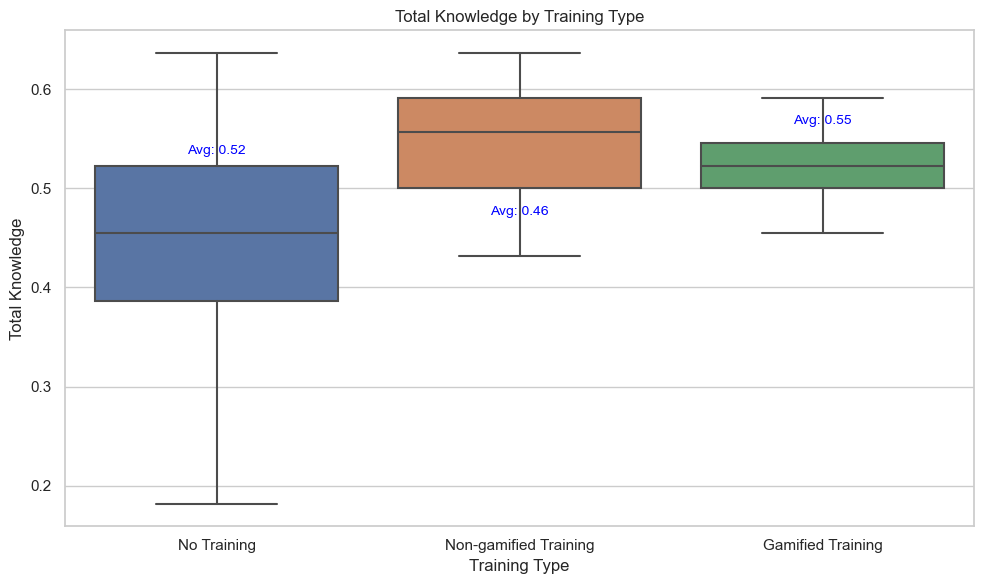

In [89]:


# Create the boxplot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='TypeOfTraining', y='TotalKnowledge', data=data, showfliers=False)  # showfliers=False removes outliers

# Calculate and annotate the average Total Knowledge for each training type
averages = data.groupby('TypeOfTraining')['TotalKnowledge'].mean()
for i, avg in enumerate(averages):
    plt.text(i, avg + 0.01, f'Avg: {avg:.2f}', ha='center', va='bottom', fontsize=10, color='blue')

# Customize the plot
plt.title('Total Knowledge by Training Type')
plt.xlabel('Training Type')
plt.ylabel('Total Knowledge')

# Show the plot
plt.tight_layout()
plt.show()
